In [19]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import map_coordinates


In [13]:
# List of experiment directories
experiment_dirs = [
    '/global/homes/y/yn754/kernel-s2e/plots/nr_2_bkw0.0005',
    '/global/homes/y/yn754/kernel-s2e/plots/nr_3_bkw0.0005',
    '/global/homes/y/yn754/kernel-s2e/plots/nr_4_bkw0.0005',
    '/global/homes/y/yn754/kernel-s2e/plots/nr_2_bkw0.005',
    '/global/homes/y/yn754/kernel-s2e/plots/nr_3_bkw0.005',
    '/global/homes/y/yn754/kernel-s2e/plots/nr_4_bkw0.005',
    '/global/homes/y/yn754/kernel-s2e/plots/nr_2_bkw0.05',
    '/global/homes/y/yn754/kernel-s2e/plots/nr_3_bkw0.05',
    '/global/homes/y/yn754/kernel-s2e/plots/nr_4_bkw0.05'
]


In [ ]:
data_path = 

load all examples

In [ ]:
#load processed data
data = np.load(os.path.join(data_path, 'data_arrays.npz'))

# Access individual arrays
s_bkg_2d = data['s_bkg_2d']
s_sig_2d = data['s_sig_2d']
s_sim_2d = data['s_sim_2d']
s_exp_2d = data['s_exp_2d']
s_exp_full_2d = data['s_exp_full_2d']
s_sim_full_2d = data['s_sim_full_2d']
s_bkg_full_2d = data['s_bkg_full_2d']
s_sig_full_2d = data['s_sig_full_2d']

In [ ]:
noise_full_2d = s_exp_full_2d  - s_bkg_full_2d - s_sig_full_2d

compare time space

/tmp/ipykernel_997911/1162820960.py:67: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', n_experiments)


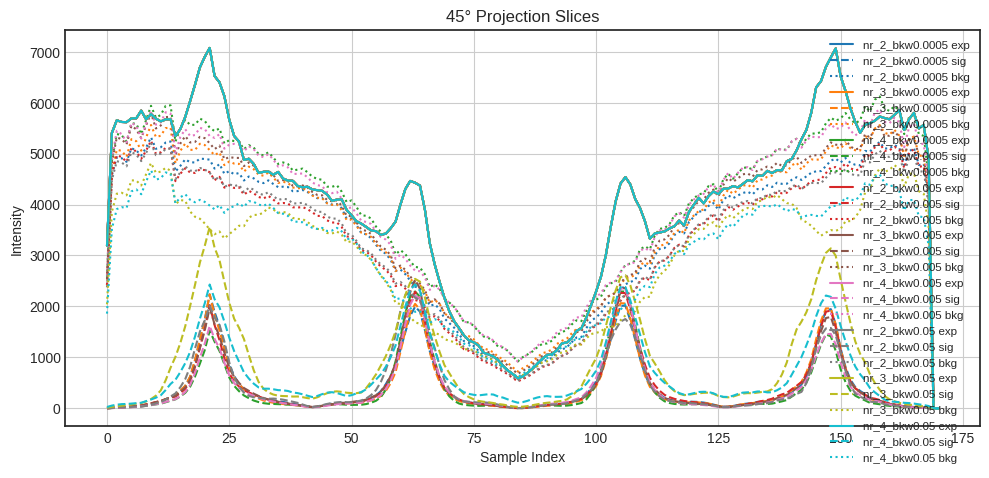

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.ndimage import map_coordinates

# =======================
# Define the helper function
# =======================
def extract_proj_slice(data, theta, num_points=None, order=1):
    """
    Extract a 1D projection slice from a 2D image at an angle theta.
    
    Parameters
    ----------
    data : 2D numpy array
        The input image (time/spatial domain).
    theta : float
        The angle in radians at which to take the slice (0 is horizontal).
    num_points : int, optional
        The number of sample points along the slice. Defaults to the diagonal length.
    order : int, optional
        The interpolation order (default is linear, order=1).
    
    Returns
    -------
    proj_line : 1D numpy array
        The interpolated 1D slice.
    """
    nrows, ncols = data.shape
    if num_points is None:
        num_points = int(np.hypot(nrows, ncols))
    
    L = num_points
    coords = np.linspace(-L/2, L/2, num_points)
    # Compute coordinates along the line at angle theta
    x_coords = coords * np.cos(theta)
    y_coords = coords * np.sin(theta)
    
    # Shift the coordinates so that the line passes through the image center.
    center_x = ncols / 2
    center_y = nrows / 2
    x_coords_shifted = center_x + x_coords
    y_coords_shifted = center_y + y_coords
    
    # Interpolate the 2D data along these coordinates.
    proj_line = map_coordinates(data, [y_coords_shifted, x_coords_shifted], order=order)
    return proj_line

# =======================
# Setup colormap and legend helper
# =======================
# Define your experiment directories (adjust the list as needed)
experiment_dirs = [
    '/global/homes/y/yn754/kernel-s2e/plots/nr_2_bkw0.0005',
    '/global/homes/y/yn754/kernel-s2e/plots/nr_3_bkw0.0005',
    '/global/homes/y/yn754/kernel-s2e/plots/nr_4_bkw0.0005',
    '/global/homes/y/yn754/kernel-s2e/plots/nr_2_bkw0.005',
    '/global/homes/y/yn754/kernel-s2e/plots/nr_3_bkw0.005',
    '/global/homes/y/yn754/kernel-s2e/plots/nr_4_bkw0.005',
    '/global/homes/y/yn754/kernel-s2e/plots/nr_2_bkw0.05',
    '/global/homes/y/yn754/kernel-s2e/plots/nr_3_bkw0.05',
    '/global/homes/y/yn754/kernel-s2e/plots/nr_4_bkw0.05'
]

n_experiments = len(experiment_dirs)
cmap = cm.get_cmap('tab10', n_experiments)

def unique_legend(ax):
    handles, labels = ax.get_legend_handles_labels()
    by_label = {}
    for handle, label in zip(handles, labels):
        if label not in by_label:
            by_label[label] = handle
    ax.legend(list(by_label.values()), list(by_label.keys()), fontsize='small', loc='best')

# =======================
# Create the overall figure (here we show the 45° slices in one plot)
# =======================
fig, ax = plt.subplots(figsize=(10, 5))

for i, exp_dir in enumerate(experiment_dirs):
    color = cmap(i)
    label_base = os.path.basename(exp_dir)

    data = np.load(os.path.join(exp_dir, 'data_arrays.npz'))
    s_exp = data['s_exp_full_2d'].sum(-1).sum(-1)
    s_sig = data['s_sig_full_2d'].sum(-1).sum(-1)
    s_bkg = data['s_bkg_full_2d'].sum(-1).sum(-1)

    proj_exp = extract_proj_slice(s_exp, theta)
    proj_sig = extract_proj_slice(s_sig, theta)
    proj_bkg = extract_proj_slice(s_bkg, theta)

    ax.plot(proj_exp, color=color, linestyle='-',  label=f'{label_base} exp')
    ax.plot(proj_sig, color=color, linestyle='--', label=f'{label_base} sig')
    ax.plot(proj_bkg, color=color, linestyle=':',  label=f'{label_base} bkg')

ax.set_xlabel('Sample Index')
ax.set_ylabel('Intensity')
ax.set_title('45° Projection Slices')
ax.grid(True)
unique_legend(ax)

plt.tight_layout()
plt.show()

/tmp/ipykernel_997911/2540737233.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', n_experiments)


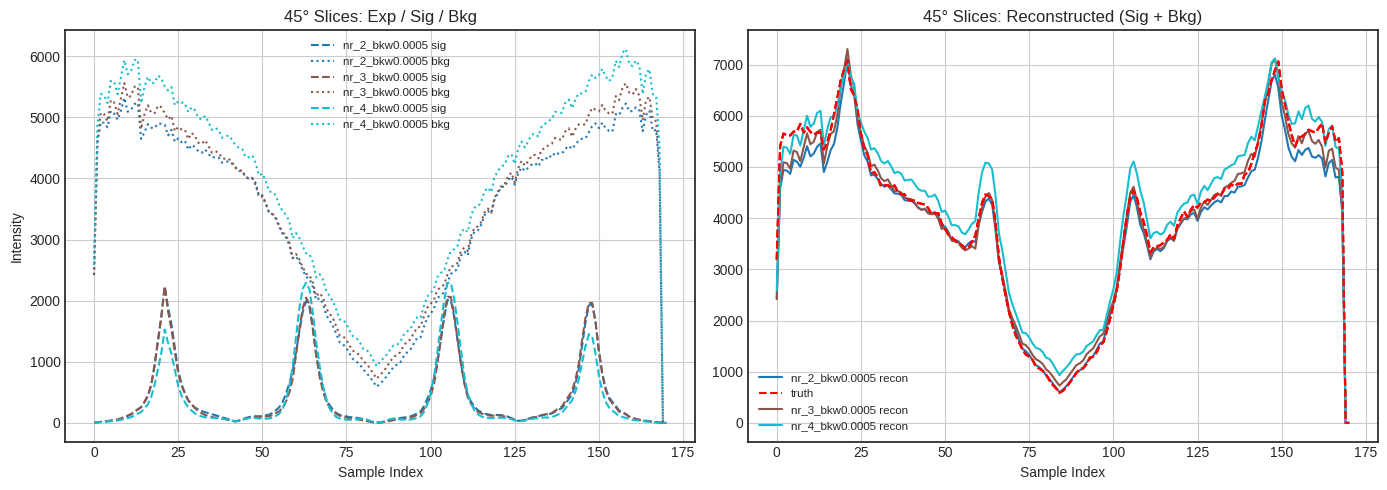

In [80]:
# Define your experiment directories (adjust the list as needed)
experiment_dirs = [
    '/global/homes/y/yn754/kernel-s2e/plots/nr_2_bkw0.0005',
    '/global/homes/y/yn754/kernel-s2e/plots/nr_3_bkw0.0005',
    '/global/homes/y/yn754/kernel-s2e/plots/nr_4_bkw0.0005',
]

n_experiments = len(experiment_dirs)
cmap = cm.get_cmap('tab10', n_experiments)

def unique_legend(ax):
    handles, labels = ax.get_legend_handles_labels()
    by_label = {}
    for handle, label in zip(handles, labels):
        if label not in by_label:
            by_label[label] = handle
    ax.legend(list(by_label.values()), list(by_label.keys()), fontsize='small', loc='best')

# =======================
# Create the overall figure (here we show the 45° slices in one plot)
# =======================
# -----------------------
# Plotting
# -----------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

for i, exp_dir in enumerate(experiment_dirs):
    color = cmap(i)
    label_base = os.path.basename(exp_dir)

    data = np.load(os.path.join(exp_dir, 'data_arrays.npz'))
    s_exp = data['s_exp_full_2d'].sum(-1).sum(-1)
    s_sig = data['s_sig_full_2d'].sum(-1).sum(-1)
    s_bkg = data['s_bkg_full_2d'].sum(-1).sum(-1)

    proj_exp = extract_proj_slice(s_exp, theta)
    proj_sig = extract_proj_slice(s_sig, theta)
    proj_bkg = extract_proj_slice(s_bkg, theta)
    proj_recon = proj_bkg + proj_sig

    # Left subplot: raw signal components
    ax1.plot(proj_sig, color=color, linestyle='--', label=f'{label_base} sig')
    ax1.plot(proj_bkg, color=color, linestyle=':',  label=f'{label_base} bkg')

    # Right subplot: reconstruction (bkg + sig)
    ax2.plot(proj_recon, color=color, linestyle='-', label=f'{label_base} recon')
    ax2.plot(proj_exp, color='red', linestyle='--', label='truth')
# -----------------------
# Formatting
# -----------------------
ax1.set_title('45° Slices: Exp / Sig / Bkg')
ax1.set_xlabel('Sample Index')
ax1.set_ylabel('Intensity')
ax1.grid(True)
unique_legend(ax1)

ax2.set_title('45° Slices: Reconstructed (Sig + Bkg)')
ax2.set_xlabel('Sample Index')
ax2.grid(True)
unique_legend(ax2)

plt.tight_layout()
plt.show()

compare spectrumn (Fourier Projection Slice)
- $lambda is chosen with the value where s_sig are zero outside its local supports

In [87]:
experiment_dirs = [
    '/global/homes/y/yn754/kernel-s2e/plots/nr_2_bkw0.0005',
    '/global/homes/y/yn754/kernel-s2e/plots/nr_3_bkw0.0005',
    '/global/homes/y/yn754/kernel-s2e/plots/nr_4_bkw0.0005',
    '/global/homes/y/yn754/kernel-s2e/plots/nr_2_bkw0.005',
    '/global/homes/y/yn754/kernel-s2e/plots/nr_3_bkw0.005',
    '/global/homes/y/yn754/kernel-s2e/plots/nr_4_bkw0.005',
    '/global/homes/y/yn754/kernel-s2e/plots/nr_2_bkw0.05',
    '/global/homes/y/yn754/kernel-s2e/plots/nr_3_bkw0.05',
    '/global/homes/y/yn754/kernel-s2e/plots/nr_4_bkw0.05'
]

<>:83: SyntaxWarning: invalid escape sequence '\h'
<>:85: SyntaxWarning: invalid escape sequence '\h'
<>:83: SyntaxWarning: invalid escape sequence '\h'
<>:85: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_997911/3397076203.py:83: SyntaxWarning: invalid escape sequence '\h'
  axes[0, 1].set_title('$|\hat f(\epsilon)|$ (Measured)')
/tmp/ipykernel_997911/3397076203.py:85: SyntaxWarning: invalid escape sequence '\h'
  axes[1, 1].set_title('$|\hat f(\epsilon)|$ (Reconstructed)')
/tmp/ipykernel_997911/3397076203.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', n_experiments)


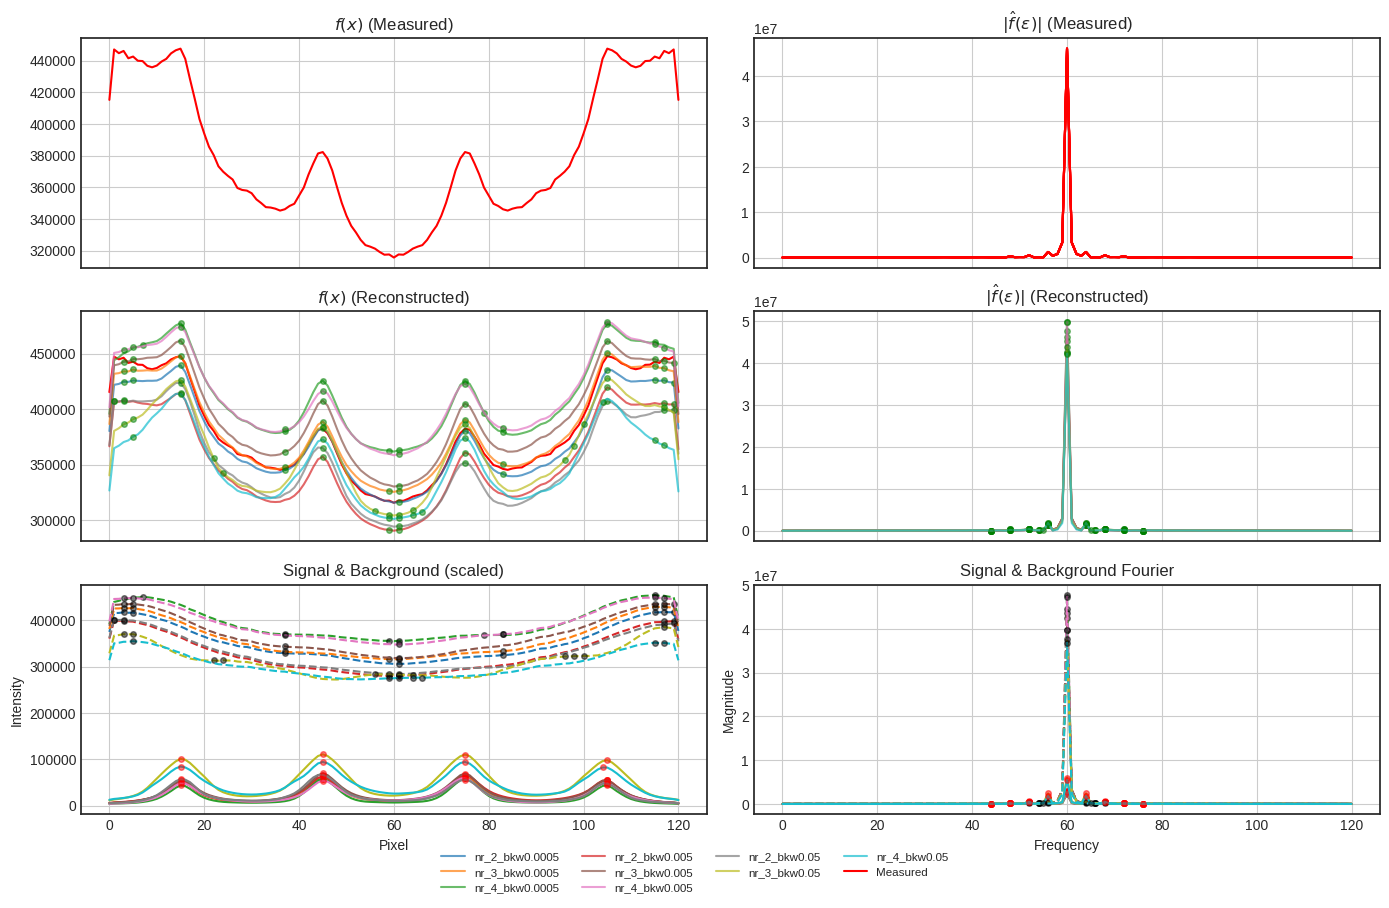

In [88]:
# Create a colormap with as many distinct colors as experiments
n_experiments = len(experiment_dirs)
cmap = cm.get_cmap('tab10', n_experiments)

# Create overall figure with 3 rows x 2 columns of subplots.
fig, axes = plt.subplots(3, 2, figsize=(14, 9), sharex='col')

# Storage for all legend entries
legend_handles = []
legend_labels = []

for i, exp_dir in enumerate(experiment_dirs):
    color = cmap(i)
    label = os.path.basename(exp_dir)

    npz_file = os.path.join(exp_dir, 'data_arrays.npz')
    data = np.load(npz_file)
    
    # Extract arrays
    S_expt_plot = data['s_exp_full_2d'].sum(-1).sum(-1)
    S_sig_plot  = data['s_sig_full_2d'].sum(-1).sum(-1)
    S_bkg_plot  = data['s_bkg_full_2d'].sum(-1).sum(-1)

    # Compute spatial projections
    proj_exp = np.sum(S_expt_plot, axis=0)
    proj_sig = np.sum(S_sig_plot, axis=0)
    proj_bkg = np.sum(S_bkg_plot, axis=0)

    # Compute Fourier slices
    slice_exp2 = np.fft.fftshift(np.fft.fft2(S_expt_plot))[S_expt_plot.shape[0] // 2]
    slice_sig2 = np.fft.fftshift(np.fft.fft2(S_sig_plot))[S_sig_plot.shape[0] // 2]
    slice_bkg2 = np.fft.fftshift(np.fft.fft2(S_bkg_plot))[S_bkg_plot.shape[0] // 2]

    # Only plot proj_exp once (first iteration)
    if i == 0:
        axes[0, 0].plot(proj_exp, color='red', label='Measured')
        axes[1, 0].plot(proj_exp, color='red', label='Measured')

    # Row 0: Measured (only once)
    axes[0, 1].plot(np.abs(slice_exp2), color='red')

    # Row 1: Reconstruction
    recon_spatial = proj_bkg + proj_sig
    h1, = axes[1, 0].plot(recon_spatial, color=color, alpha=0.7, label=label)
    recon_freq = np.abs(slice_bkg2 + slice_sig2)
    h2, = axes[1, 1].plot(recon_freq, color=color, alpha=0.7)

    # Row 2: Signal and Background 
    proj_sig_scaled = proj_sig 
    proj_bkg_scaled = proj_bkg 

    axes[2, 0].plot(proj_bkg_scaled, color=color, linestyle='--')
    axes[2, 0].plot(proj_sig_scaled, color=color, linestyle='-')

    axes[2, 1].plot(np.abs(slice_bkg2), color=color, linestyle='--')
    axes[2, 1].plot(np.abs(slice_sig2), color=color, linestyle='-')

    # Local maxima
    mag_sig = np.abs(slice_sig2)
    mag_bkg = np.abs(slice_bkg2)
    idx1 = find_peaks(mag_sig, prominence=5e4)[0]
    idx2 = find_peaks(mag_bkg, prominence=5e4)[0]
    idx_union = np.union1d(idx1, idx2)

    axes[2, 1].plot(idx1, mag_sig[idx1], 'ro', alpha=0.5, markersize=4)
    axes[2, 1].plot(idx2, mag_bkg[idx2], 'ko', alpha=0.5, markersize=4)
    axes[1, 1].plot(idx_union, recon_freq[idx_union], 'go', alpha=0.5, markersize=4)

    idx1_spatial = find_peaks(proj_sig, prominence=5)[0]
    idx2_spatial = find_peaks(proj_bkg, prominence=5)[0]
    idx_union_spatial = np.union1d(idx1_spatial, idx2_spatial)

    axes[2, 0].plot(idx1_spatial, proj_sig_scaled[idx1_spatial], 'ro', alpha=0.5, markersize=4)
    axes[2, 0].plot(idx2_spatial, proj_bkg_scaled[idx2_spatial], 'ko', alpha=0.5, markersize=4)
    axes[1, 0].plot(idx_union_spatial, recon_spatial[idx_union_spatial], 'go', alpha=0.5, markersize=4)

    # Store legend handles
    legend_handles.append(h1)
    legend_labels.append(label)

# Titles and axis labels
axes[0, 0].set_title('$f(x)$ (Measured)')
axes[0, 1].set_title('$|\hat f(\epsilon)|$ (Measured)')
axes[1, 0].set_title('$f(x)$ (Reconstructed)')
axes[1, 1].set_title('$|\hat f(\epsilon)|$ (Reconstructed)')
axes[2, 0].set_title('Signal & Background (scaled)')
axes[2, 1].set_title('Signal & Background Fourier')

axes[2, 0].set_xlabel('Pixel')
axes[2, 0].set_ylabel('Intensity')
axes[2, 1].set_xlabel('Frequency')
axes[2, 1].set_ylabel('Magnitude')

# Style
for ax in axes.flat:
    ax.grid(True)

# Add single global legend outside the figure (bottom center)
fig.legend(handles=legend_handles + [plt.Line2D([], [], color='red', label='Measured')],
           labels=legend_labels + ['Measured'],
           loc='lower center', bbox_to_anchor=(0.5, -0.01),
           ncol=4, fontsize='small', frameon=False)

plt.style.use('seaborn-v0_8-white')
plt.tight_layout(rect=[0, 0.03, 1, 1])  # leave space at bottom for legend

# Save
filename = 'fourier_projection_slice_overall.png'
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()


The choice of $lambda

In [83]:
# List of experiment directories
experiment_dirs = [
    '/global/homes/y/yn754/kernel-s2e/plots/nr_2_bkw0.0005',
    '/global/homes/y/yn754/kernel-s2e/plots/nr_2_bkw0.005',
    '/global/homes/y/yn754/kernel-s2e/plots/nr_2_bkw0.05',
]


<>:50: SyntaxWarning: invalid escape sequence '\h'
<>:63: SyntaxWarning: invalid escape sequence '\h'
<>:50: SyntaxWarning: invalid escape sequence '\h'
<>:63: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_997911/1644031378.py:50: SyntaxWarning: invalid escape sequence '\h'
  axes[0, 1].set_title('$|\hat f(\epsilon)|$ (Measured)')
/tmp/ipykernel_997911/1644031378.py:63: SyntaxWarning: invalid escape sequence '\h'
  axes[1, 1].set_title('r$|\hat f(\epsilon)|$ (Reconstructed)')
/tmp/ipykernel_997911/1644031378.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', n_experiments)


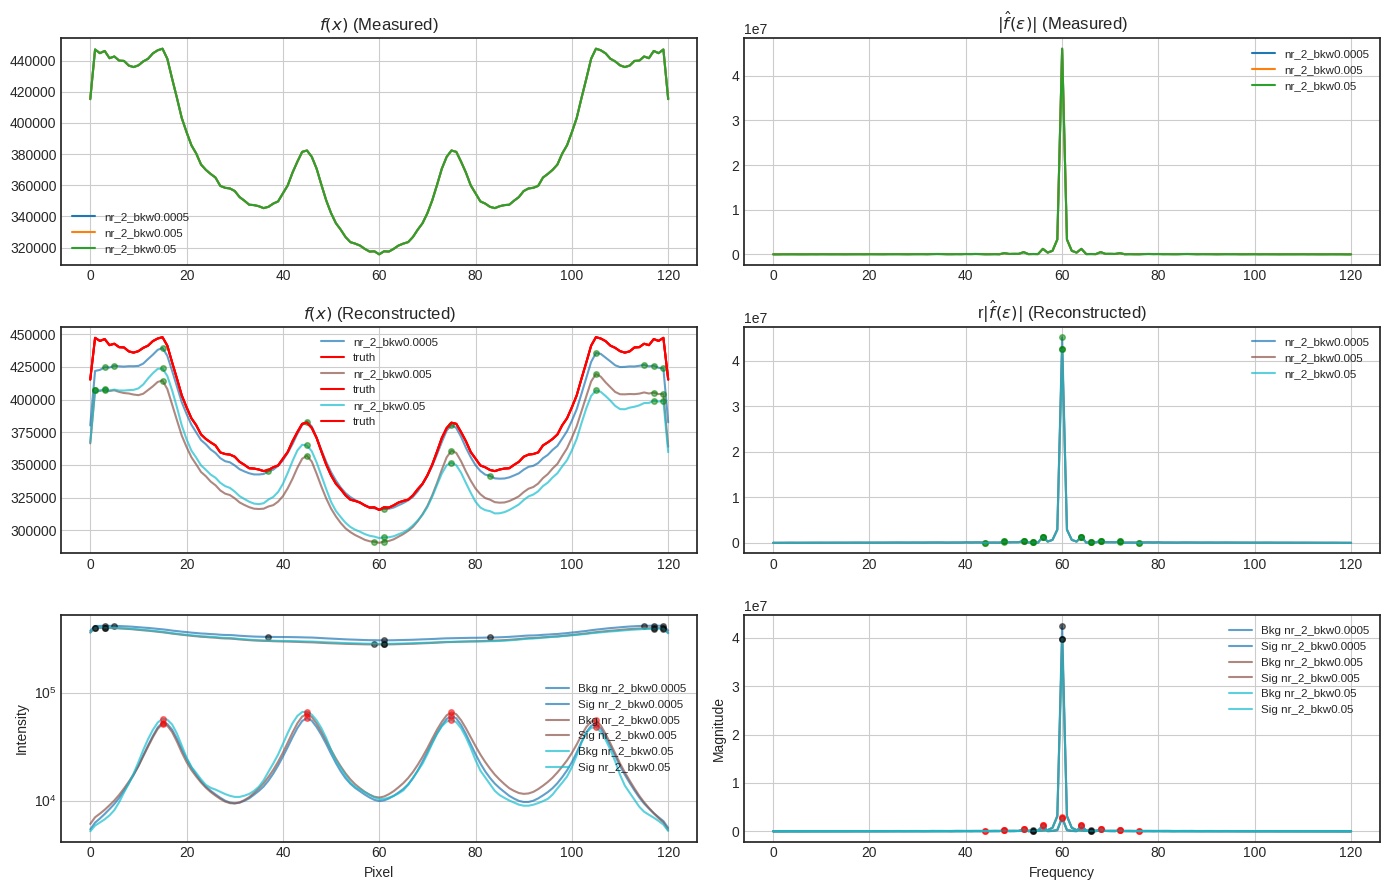

In [ ]:
# Create a colormap with as many distinct colors as experiments
n_experiments = len(experiment_dirs)
cmap = cm.get_cmap('tab10', n_experiments)

# A helper function to create a unique legend (avoiding duplicate labels)
def unique_legend(ax):
    handles, labels = ax.get_legend_handles_labels()
    by_label = {}
    for handle, label in zip(handles, labels):
        if label not in by_label:
            by_label[label] = handle
    ax.legend(list(by_label.values()), list(by_label.keys()), fontsize='small', loc='best')

# Create overall figure with 3 rows x 2 columns of subplots.
fig, axes = plt.subplots(3, 2, figsize=(14, 9))

# Loop over experiments and add curves in each subplot.
for i,exp_dir in enumerate(experiment_dirs):

    color = cmap(i)

    npz_file = os.path.join(exp_dir, 'data_arrays.npz')
    data = np.load(npz_file)
    
    # Extract arrays
    S_expt_plot = data['s_exp_full_2d'].sum(-1).sum(-1)
    S_sig_plot  = data['s_sig_full_2d'].sum(-1).sum(-1)
    S_bkg_plot  = data['s_bkg_full_2d'].sum(-1).sum(-1)
 
    # Compute spatial projections (sum over rows)
    proj_exp = np.sum(S_expt_plot, axis=0)
    proj_sig = np.sum(S_sig_plot, axis=0)
    proj_bkg = np.sum(S_bkg_plot, axis=0)
    
    # Compute Fourier slices by taking the 2D FFT and selecting the middle row:
    slice_exp2 = np.fft.fftshift(np.fft.fft2(S_expt_plot))[S_expt_plot.shape[0] // 2]
    slice_sig2 = np.fft.fftshift(np.fft.fft2(S_sig_plot))[S_sig_plot.shape[0] // 2]
    slice_bkg2 = np.fft.fftshift(np.fft.fft2(S_bkg_plot))[S_bkg_plot.shape[0] // 2]
    
    # Use the directory's base name as the label.
    label = os.path.basename(exp_dir)
    
    # --------------------------
    # Row 0: "Truth" (measured) curves
    # Left: Spatial domain curve of measured data
    axes[0, 0].plot(proj_exp, label=label)
    axes[0, 0].set_title('$f(x)$ (Measured)')
    # Right: Fourier domain (absolute value) of measured data
    axes[0, 1].plot(np.abs(slice_exp2), label=label)
    axes[0, 1].set_title('$|\hat f(\epsilon)|$ (Measured)')

    # --------------------------
    # Row 1: "Reconstructed" curves (background + signal)
    # Left: Spatial reconstruction
    recon_spatial = proj_bkg + proj_sig
    axes[1, 0].plot(recon_spatial, color = color, alpha=0.7, label=label)
    axes[1, 0].plot(proj_exp, color = 'red',label = 'truth')
    axes[1, 0].set_title('$f(x)$ (Reconstructed)')
    
    # Right: Fourier reconstruction from signal and background
    recon_freq = np.abs(slice_bkg2 + slice_sig2)
    axes[1, 1].plot(recon_freq, color=color, alpha=0.7, label=label)
    axes[1, 1].set_title('r$|\hat f(\epsilon)|$ (Reconstructed)')
    
    # --------------------------
    # Row 2: Plots of signal and background separately
    # Left: Spatial domain: Plot background (black) and signal (red)
    axes[2, 0].plot(proj_bkg, color=color, alpha=0.7, label=f'Bkg {label}')
    axes[2, 0].plot(proj_sig, color=color, alpha=0.7, label=f'Sig {label}')
    axes[2, 0].set_xlabel('Pixel')
    axes[2, 0].set_ylabel('Intensity')
    
    # Right: Fourier domain: Plot background (black) and signal (red)
    axes[2, 1].plot(np.abs(slice_bkg2), color=color, alpha=0.7, label=f'Bkg {label}')
    axes[2, 1].plot(np.abs(slice_sig2), color=color, alpha=0.7, label=f'Sig {label}')
    axes[2, 1].set_xlabel('Frequency')
    axes[2, 1].set_ylabel('Magnitude')
    
    # --------------------------
    # Add local maxima to aid the comparison:
    
    # Frequency domain (row 2, col 2):
    mag_sig = np.abs(slice_sig2)
    mag_bkg = np.abs(slice_bkg2)
    idx1 = find_peaks(mag_sig, prominence=5e4)[0]
    idx2 = find_peaks(mag_bkg, prominence=5e4)[0]
    idx_union = np.union1d(idx1, idx2)
    
    # Mark the peaks on the Fourier domain individual plot (row 2, col 2)
    axes[2, 1].plot(idx1, mag_sig[idx1], 'ro', alpha=0.5, markersize=4)
    axes[2, 1].plot(idx2, mag_bkg[idx2], 'ko', alpha=0.5, markersize=4)
    
    # Mark the combined peaks on the reconstructed FFT curve (row 1, col 2)
    axes[1, 1].plot(idx_union, recon_freq[idx_union], 'go', alpha=0.5, markersize=4)
    
    # Spatial domain (row 2, col 1):
    idx1_spatial = find_peaks(proj_sig, prominence=5)[0]
    idx2_spatial = find_peaks(proj_bkg, prominence=5)[0]
    idx_union_spatial = np.union1d(idx1_spatial, idx2_spatial)
    
    # Mark the peaks on the individual curves of the spatial domain plot (row 2, col 1)
    axes[2, 0].plot(idx1_spatial, proj_sig[idx1_spatial], 'ro', alpha=0.5, markersize=4)
    axes[2, 0].plot(idx2_spatial, proj_bkg[idx2_spatial], 'ko', alpha=0.5, markersize=4)
    
    # Mark combined peaks on the reconstructed spatial signal (row 1, col 1)
    axes[1, 0].plot(idx_union_spatial, recon_spatial[idx_union_spatial], 'go', alpha=0.5, markersize=4)

# --------------------------
# Final formatting adjustments
for ax in axes.flat:
    ax.grid(True)
    # Use a smaller font-size for the legends if needed.
    ax.legend(fontsize='small', loc='best')

plt.style.use('seaborn-v0_8-white')
plt.tight_layout()

# Save the overall figure to a file
filename = 'fourier_projection_slice_overall.png'
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()

the choise of neighbor

In [17]:
# List of experiment directories
experiment_dirs = [
    '/global/homes/y/yn754/kernel-s2e/plots/nr_2_bkw0.0005',
    '/global/homes/y/yn754/kernel-s2e/plots/nr_3_bkw0.0005',
    '/global/homes/y/yn754/kernel-s2e/plots/nr_4_bkw0.0005',
]

/tmp/ipykernel_997911/2976522188.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', n_experiments)


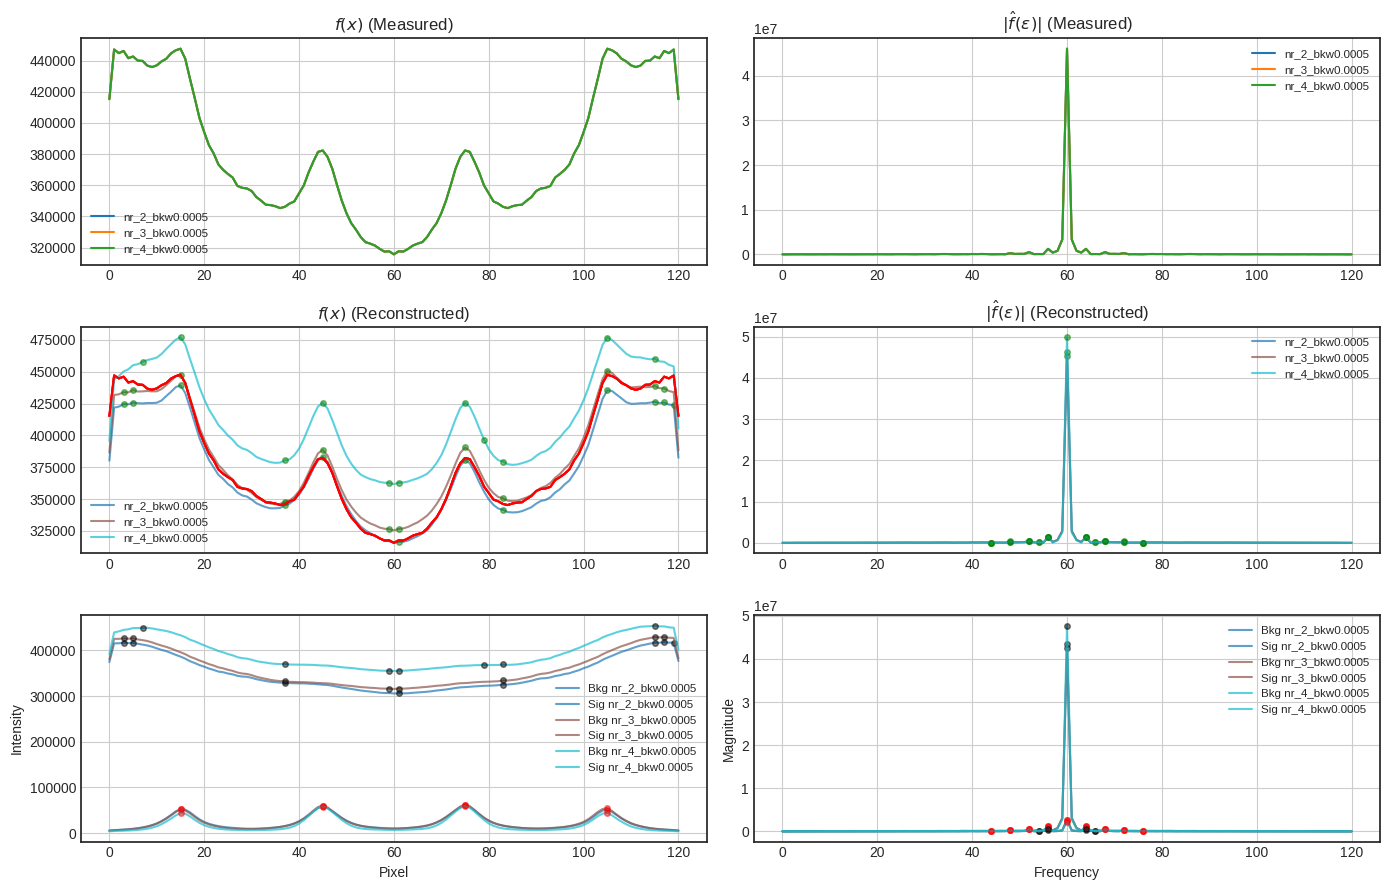

In [30]:
# Create a colormap with as many distinct colors as experiments
n_experiments = len(experiment_dirs)
cmap = cm.get_cmap('tab10', n_experiments)

# A helper function to create a unique legend (avoiding duplicate labels)
def unique_legend(ax):
    handles, labels = ax.get_legend_handles_labels()
    by_label = {}
    for handle, label in zip(handles, labels):
        if label not in by_label:
            by_label[label] = handle
    ax.legend(list(by_label.values()), list(by_label.keys()), fontsize='small', loc='best')

# Create overall figure with 3 rows x 2 columns of subplots.
fig, axes = plt.subplots(3, 2, figsize=(14, 9))

# Loop over experiments and add curves in each subplot.
for i,exp_dir in enumerate(experiment_dirs):

    color = cmap(i)

    npz_file = os.path.join(exp_dir, 'data_arrays.npz')
    data = np.load(npz_file)
    
    # Extract arrays
    S_expt_plot = data['s_exp_full_2d'].sum(-1).sum(-1)
    S_sig_plot  = data['s_sig_full_2d'].sum(-1).sum(-1)
    S_bkg_plot  = data['s_bkg_full_2d'].sum(-1).sum(-1)
 
    # Compute spatial projections (sum over rows)
    proj_exp = np.sum(S_expt_plot, axis=0)
    proj_sig = np.sum(S_sig_plot, axis=0)
    proj_bkg = np.sum(S_bkg_plot, axis=0)
    
    # Compute Fourier slices by taking the 2D FFT and selecting the middle row:
    slice_exp2 = np.fft.fftshift(np.fft.fft2(S_expt_plot))[S_expt_plot.shape[0] // 2]
    slice_sig2 = np.fft.fftshift(np.fft.fft2(S_sig_plot))[S_sig_plot.shape[0] // 2]
    slice_bkg2 = np.fft.fftshift(np.fft.fft2(S_bkg_plot))[S_bkg_plot.shape[0] // 2]
    
    # Use the directory's base name as the label.
    label = os.path.basename(exp_dir)
    
    # --------------------------
    # Row 0: "Truth" (measured) curves
    # Left: Spatial domain curve of measured data
    axes[0, 0].plot(proj_exp, label=label)
    axes[0, 0].set_title('$f(x)$ (Measured)')
    # Right: Fourier domain (absolute value) of measured data
    axes[0, 1].plot(np.abs(slice_exp2), label=label)
    axes[0, 1].set_title(r'$|\hat f(\epsilon)|$ (Measured)')

    # --------------------------
    # Row 1: "Reconstructed" curves (background + signal)
    # Left: Spatial reconstruction
    recon_spatial = proj_bkg + proj_sig
    axes[1, 0].plot(recon_spatial, color = color, alpha=0.7, label=label)
    axes[1, 0].plot(proj_exp, color = 'red')
    axes[1, 0].set_title('$f(x)$ (Reconstructed)')
    
    # Right: Fourier reconstruction from signal and background
    recon_freq = np.abs(slice_bkg2 + slice_sig2)
    axes[1, 1].plot(recon_freq, color=color, alpha=0.7, label=label)
    axes[1, 1].set_title(r'$|\hat f(\epsilon)|$ (Reconstructed)')
    
    # --------------------------
    # Row 2: Plots of signal and background separately
    # Left: Spatial domain: Plot background (black) and signal (red)
    axes[2, 0].plot(proj_bkg, color=color, alpha=0.7, label=f'Bkg {label}')
    axes[2, 0].plot(proj_sig, color=color, alpha=0.7, label=f'Sig {label}')
    axes[2, 0].set_xlabel('Pixel')
    axes[2, 0].set_ylabel('Intensity')
    
    # Right: Fourier domain: Plot background (black) and signal (red)
    axes[2, 1].plot(np.abs(slice_bkg2), color=color, alpha=0.7, label=f'Bkg {label}')
    axes[2, 1].plot(np.abs(slice_sig2), color=color, alpha=0.7, label=f'Sig {label}')
    axes[2, 1].set_xlabel('Frequency')
    axes[2, 1].set_ylabel('Magnitude')
    
    # --------------------------
    # Add local maxima to aid the comparison:
    
    # Frequency domain (row 2, col 2):
    mag_sig = np.abs(slice_sig2)
    mag_bkg = np.abs(slice_bkg2)
    idx1 = find_peaks(mag_sig, prominence=5e4)[0]
    idx2 = find_peaks(mag_bkg, prominence=5e4)[0]
    idx_union = np.union1d(idx1, idx2)
    
    # Mark the peaks on the Fourier domain individual plot (row 2, col 2)
    axes[2, 1].plot(idx1, mag_sig[idx1], 'ro', alpha=0.5, markersize=4)
    axes[2, 1].plot(idx2, mag_bkg[idx2], 'ko', alpha=0.5, markersize=4)
    
    # Mark the combined peaks on the reconstructed FFT curve (row 1, col 2)
    axes[1, 1].plot(idx_union, recon_freq[idx_union], 'go', alpha=0.5, markersize=4)
    
    # Spatial domain (row 2, col 1):
    idx1_spatial = find_peaks(proj_sig, prominence=5)[0]
    idx2_spatial = find_peaks(proj_bkg, prominence=5)[0]
    idx_union_spatial = np.union1d(idx1_spatial, idx2_spatial)
    
    # Mark the peaks on the individual curves of the spatial domain plot (row 2, col 1)
    axes[2, 0].plot(idx1_spatial, proj_sig[idx1_spatial], 'ro', alpha=0.5, markersize=4)
    axes[2, 0].plot(idx2_spatial, proj_bkg[idx2_spatial], 'ko', alpha=0.5, markersize=4)
    
    # Mark combined peaks on the reconstructed spatial signal (row 1, col 1)
    axes[1, 0].plot(idx_union_spatial, recon_spatial[idx_union_spatial], 'go', alpha=0.5, markersize=4)

# --------------------------
# Final formatting adjustments
for ax in axes.flat:
    ax.grid(True)
    # Use a smaller font-size for the legends if needed.
    ax.legend(fontsize='small', loc='best')

plt.style.use('seaborn-v0_8-white')
plt.tight_layout()

# Save the overall figure to a file
filename = 'fourier_projection_slice_overall.png'
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()

best plot
- nr_2_bkw0.0005

<>:32: SyntaxWarning: invalid escape sequence '\h'
<>:44: SyntaxWarning: invalid escape sequence '\h'
<>:32: SyntaxWarning: invalid escape sequence '\h'
<>:44: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_997911/4018810058.py:32: SyntaxWarning: invalid escape sequence '\h'
  axes[0, 1].set_title('$|\hat f(\epsilon)|$ (Measured)')
/tmp/ipykernel_997911/4018810058.py:44: SyntaxWarning: invalid escape sequence '\h'
  axes[1, 1].set_title('r$|\hat f(\epsilon)|$ (Reconstructed)')


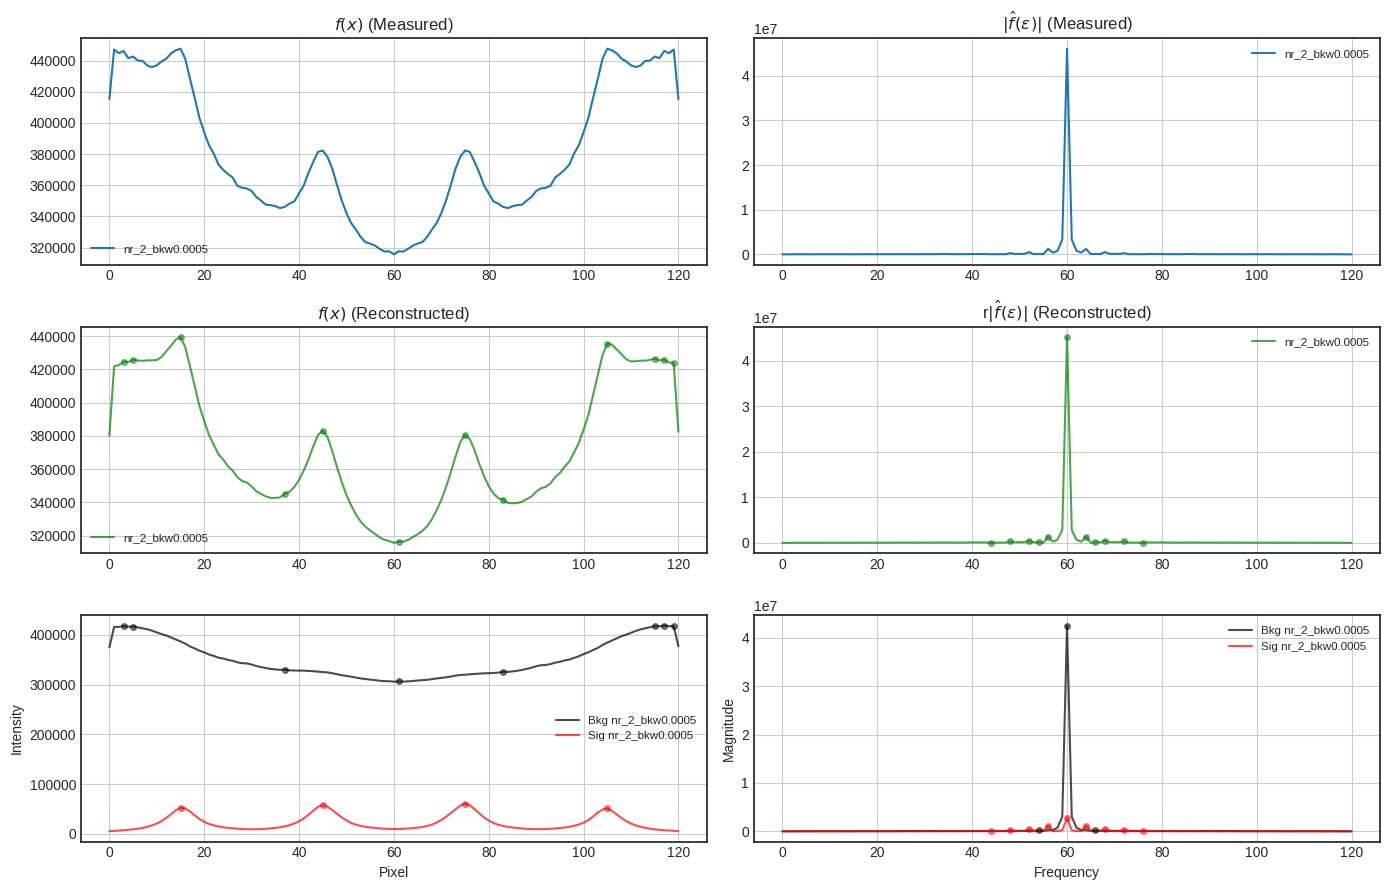

In [79]:

# Create overall figure with 3 rows x 2 columns of subplots.
fig, axes = plt.subplots(3, 2, figsize=(14, 9))

exp_dir = '/global/homes/y/yn754/kernel-s2e/plots/nr_2_bkw0.0005'
data = np.load('/global/homes/y/yn754/kernel-s2e/plots/nr_2_bkw0.0005/data_arrays.npz')
    
# Extract arrays
S_expt_plot = data['s_exp_full_2d'].sum(-1).sum(-1)
S_sig_plot  = data['s_sig_full_2d'].sum(-1).sum(-1)
S_bkg_plot  = data['s_bkg_full_2d'].sum(-1).sum(-1)
 
# Compute spatial projections (sum over rows)
proj_exp = np.sum(S_expt_plot, axis=0)
proj_sig = np.sum(S_sig_plot, axis=0)
proj_bkg = np.sum(S_bkg_plot, axis=0)
    
# Compute Fourier slices by taking the 2D FFT and selecting the middle row:
slice_exp2 = np.fft.fftshift(np.fft.fft2(S_expt_plot))[S_expt_plot.shape[0] // 2]
slice_sig2 = np.fft.fftshift(np.fft.fft2(S_sig_plot))[S_sig_plot.shape[0] // 2]
slice_bkg2 = np.fft.fftshift(np.fft.fft2(S_bkg_plot))[S_bkg_plot.shape[0] // 2]
    
# Use the directory's base name as the label.
label = os.path.basename(exp_dir)
    
# --------------------------
# Row 0: "Truth" (measured) curves
# Left: Spatial domain curve of measured data
axes[0, 0].plot(proj_exp, label=label)
axes[0, 0].set_title('$f(x)$ (Measured)')
# Right: Fourier domain (absolute value) of measured data
axes[0, 1].plot(np.abs(slice_exp2), label=label)
axes[0, 1].set_title('$|\hat f(\epsilon)|$ (Measured)')

# --------------------------
# Row 1: "Reconstructed" curves (background + signal)
# Left: Spatial reconstruction
recon_spatial = proj_bkg + proj_sig
axes[1, 0].plot(recon_spatial, color='green', alpha=0.7, label=label)
axes[1, 0].set_title('$f(x)$ (Reconstructed)')
    
# Right: Fourier reconstruction from signal and background
recon_freq = np.abs(slice_bkg2 + slice_sig2)
axes[1, 1].plot(recon_freq, color='green', alpha=0.7, label=label)
axes[1, 1].set_title('r$|\hat f(\epsilon)|$ (Reconstructed)')
    
# --------------------------
# Row 2: Plots of signal and background separately
# Left: Spatial domain: Plot background (black) and signal (red)
axes[2, 0].plot(proj_bkg, color='black', alpha=0.7, label=f'Bkg {label}')
axes[2, 0].plot(proj_sig, color='red', alpha=0.7, label=f'Sig {label}')
axes[2, 0].set_xlabel('Pixel')
axes[2, 0].set_ylabel('Intensity')
    
# Right: Fourier domain: Plot background (black) and signal (red)
axes[2, 1].plot(np.abs(slice_bkg2), color='black', alpha=0.7, label=f'Bkg {label}')
axes[2, 1].plot(np.abs(slice_sig2), color='red', alpha=0.7, label=f'Sig {label}')
axes[2, 1].set_xlabel('Frequency')
axes[2, 1].set_ylabel('Magnitude')
    
# --------------------------
# Add local maxima to aid the comparison:
    
# Frequency domain (row 2, col 2):
mag_sig = np.abs(slice_sig2)
mag_bkg = np.abs(slice_bkg2)
idx1 = find_peaks(mag_sig, prominence=5e4)[0]
idx2 = find_peaks(mag_bkg, prominence=5e4)[0]
idx_union = np.union1d(idx1, idx2)
    
# Mark the peaks on the Fourier domain individual plot (row 2, col 2)
axes[2, 1].plot(idx1, mag_sig[idx1], 'ro', alpha=0.5, markersize=4)
axes[2, 1].plot(idx2, mag_bkg[idx2], 'ko', alpha=0.5, markersize=4)
    
# Mark the combined peaks on the reconstructed FFT curve (row 1, col 2)
axes[1, 1].plot(idx_union, recon_freq[idx_union], 'go', alpha=0.5, markersize=4)
    
# Spatial domain (row 2, col 1):
idx1_spatial = find_peaks(proj_sig, prominence=5)[0]
idx2_spatial = find_peaks(proj_bkg, prominence=5)[0]
idx_union_spatial = np.union1d(idx1_spatial, idx2_spatial)
    
# Mark the peaks on the individual curves of the spatial domain plot (row 2, col 1)
axes[2, 0].plot(idx1_spatial, proj_sig[idx1_spatial], 'ro', alpha=0.5, markersize=4)
axes[2, 0].plot(idx2_spatial, proj_bkg[idx2_spatial], 'ko', alpha=0.5, markersize=4)
    
# Mark combined peaks on the reconstructed spatial signal (row 1, col 1)
axes[1, 0].plot(idx_union_spatial, recon_spatial[idx_union_spatial], 'go', alpha=0.5, markersize=4)

# --------------------------
# Final formatting adjustments
for ax in axes.flat:
    ax.grid(True)
    # Use a smaller font-size for the legends if needed.
    ax.legend(fontsize='small', loc='best')

plt.style.use('seaborn-v0_8-white')
plt.tight_layout()

# Save the overall figure to a file
filename = 'fourier_projection_slice_overall.png'
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()

Compare Pixel values
- best lambda is 5e-4
- to choose the neighbor range, we can look at the pixel difference

In [69]:
# List of experiment directories
experiment_dirs = [
    '/global/homes/y/yn754/kernel-s2e/plots/nr_2_bkw0.0005',
    '/global/homes/y/yn754/kernel-s2e/plots/nr_3_bkw0.0005',
    '/global/homes/y/yn754/kernel-s2e/plots/nr_4_bkw0.0005',
]


/tmp/ipykernel_997911/3603855568.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(experiment_dirs))


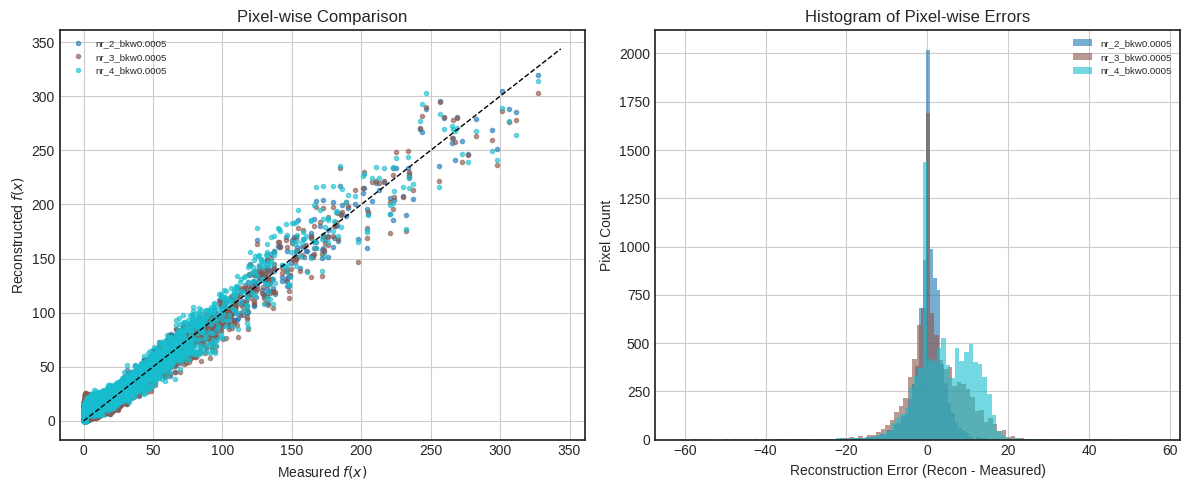

In [76]:
N_max = 100000  # max number of points to plot

# Setup colormap
cmap = cm.get_cmap('tab10', len(experiment_dirs))

# Create a figure with two subplots: (1) scatter, (2) histogram
fig, (ax_scatter, ax_hist) = plt.subplots(1, 2, figsize=(12, 5))

for i, exp_dir in enumerate(experiment_dirs):
    color = cmap(i)
    label = os.path.basename(exp_dir)
    
    # Load data
    npz_file = os.path.join(exp_dir, 'data_arrays.npz')
    data = np.load(npz_file)
    
    # Extract and flatten
    #S_expt_plot = data['s_exp_full_2d'].flatten() #4d recon
    S_expt_plot = data['s_exp_2d'].flatten() #2d
    #S_sig_plot  = data['s_sig_full_2d'].flatten() #4d
    S_sig_plot = data['s_sig_2d'].sum(0).flatten() #2d
    #S_bkg_plot  = data['s_bkg_full_2d'].flatten() #4d
    S_bkg_plot = data['s_bkg_2d'].sum(0).flatten() #2d
    S_sim_plot  = S_sig_plot + S_bkg_plot

    # Subsample
    N = len(S_expt_plot)
    if N > N_max:
        idx = np.random.choice(N, N_max, replace=False)
        S_expt_plot = S_expt_plot[idx]
        S_sim_plot  = S_sim_plot[idx]
        
    # Scatter plot of pixel-wise correspondence
    ax_scatter.plot(S_expt_plot, S_sim_plot, '.', alpha=0.6, color=color, label=label)
    
    # Histogram of pixel-wise error
    pixel_diff = S_sim_plot - S_expt_plot
    ax_hist.hist(pixel_diff, bins=100, alpha=0.6, color=color, label=label)

# Formatting the scatter plot
max_val = max(ax_scatter.get_xlim()[1], ax_scatter.get_ylim()[1])
ax_scatter.plot([0, max_val], [0, max_val], 'k--', lw=1)  # y = x line
ax_scatter.set_xlabel('Measured $f(x)$')
ax_scatter.set_ylabel('Reconstructed $f(x)$')
ax_scatter.set_title('Pixel-wise Comparison')
ax_scatter.grid(True)
ax_scatter.legend(fontsize='x-small', loc='upper left')

# Formatting the histogram
ax_hist.set_xlabel('Reconstruction Error (Recon - Measured)')
ax_hist.set_ylabel('Pixel Count')
ax_hist.set_title('Histogram of Pixel-wise Errors')
ax_hist.grid(True)
ax_hist.legend(fontsize='x-small', loc='upper right')

plt.tight_layout()
plt.show()

Compare statistics
- wont work if the pixel intensities are too small
- p=1 for neighbor range = 2

In [53]:
import numpy as np
from skimage.metrics import structural_similarity as ssim
from scipy.stats import chi2, chisquare

# ---- 1.  Image‑quality metrics ---------------------------------------------
def recon_metrics(truth, recon):
    """Return RE, RMSE, PSNR (dB), SSIM."""
    truth = np.asarray(truth, dtype=np.float64)
    recon = np.asarray(recon, dtype=np.float64)

    re  = np.linalg.norm(truth - recon) / np.linalg.norm(truth)
    mse = np.mean((truth - recon)**2)
    rmse = np.sqrt(mse)

    # dynamic range for PSNR: use max‑min of the *truth* image
    dynamic_range = truth.max() - truth.min()
    psnr = 20 * np.log10(dynamic_range / rmse) if rmse != 0 else np.inf

    ssim_val = ssim(truth, recon, data_range=dynamic_range)

    return dict(RE=re, RMSE=rmse, PSNR=psnr, SSIM=ssim_val)


# ---- 2.  χ² goodness‑of‑fit test for Poisson noise --------------------------
def poisson_chi2_test(obs, exp):
    """
    obs : observed counts  (s_exp_full_2d)
    exp : expected counts  (s_bkg_full_2d + s_sig_full_2d)

    H0: obs ~ Poisson(mean = exp)  (pixel‑wise, independent)
    Test statistic:  χ² = Σ (obs‑exp)² / exp  ~ χ²(df = N)
    """
    obs = obs.astype(np.float64).ravel()
    exp = exp.astype(np.float64).ravel()

    # guard against zero expectation (mask those pixels out)
    mask = exp > 0
    chi2_stat = np.sum((obs[mask] - exp[mask])**2 / exp[mask])
    df = mask.sum()
    p_value = 1 - chi2.cdf(chi2_stat, df)
    return chi2_stat, df, p_value


# ---- 3.  Dispersion test (variance vs mean) ---------------------------------
def dispersion_test(obs):
    """
    H0: variance == mean  (Poisson)
    Test statistic (Dean & Lawless, 1989):
        D = (Σ (xi - x̄)² - (n-1)x̄) / (√(2(n-1)) x̄)
    Under H0, D ~ N(0,1)
    """
    x = obs.astype(np.float64).ravel()
    n = x.size
    mean = x.mean()
    var = x.var(ddof=1)
    D = ( (n-1)*var - (n-1)*mean ) / (np.sqrt(2*(n-1))*mean )
    # two‑sided p‑value
    p_value = 2 * (1 - norm.cdf(abs(D)))
    return D, p_value



Reconstruction quality:
  MSE : 16.99
  RMSE: 4.122
  PSNR: 38
  SSIM: 0.9113

Poisson χ² test: χ² = 6828.51 (df=8042),  p = 1


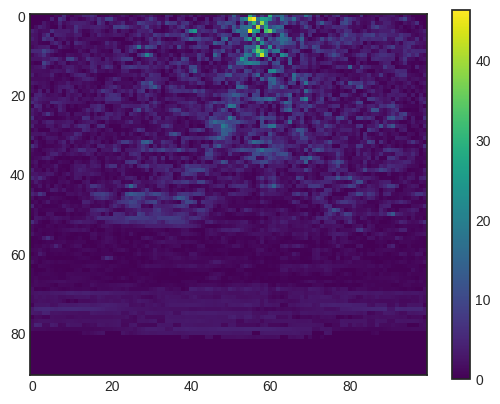

Reconstruction quality:
  MSE : 50.3
  RMSE: 7.092
  PSNR: 33.28
  SSIM: 0.7574

Poisson χ² test: χ² = 24967.08 (df=8042),  p = 0


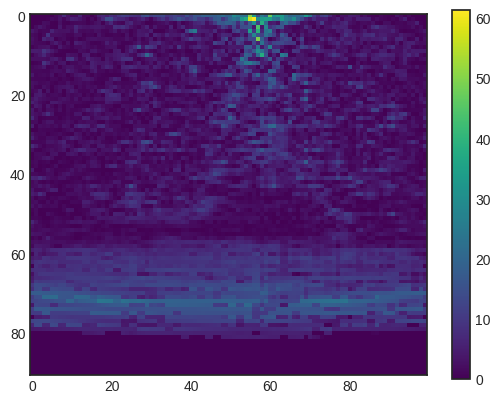

Reconstruction quality:
  MSE : 70.58
  RMSE: 8.401
  PSNR: 31.81
  SSIM: 0.7131

Poisson χ² test: χ² = 31636.26 (df=8042),  p = 0


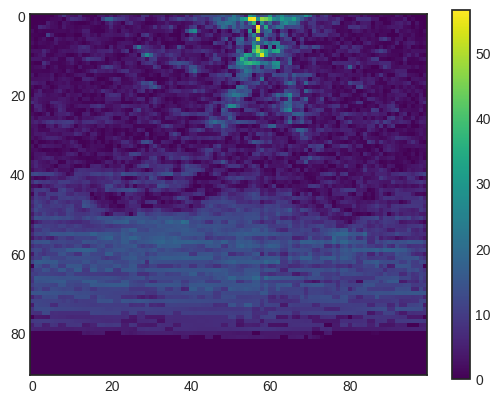

In [49]:
for i, exp_dir in enumerate(experiment_dirs):
    color = cmap(i)
    label = os.path.basename(exp_dir)
    
    # Load data
    npz_file = os.path.join(exp_dir, 'data_arrays.npz')
    data = np.load(npz_file)
    
    # ------------------------- Usage ---------------------------------------------
    # truth image
    #s_exp_full_2d = data['s_exp_full_2d'].sum(-1).sum(-1)
    s_exp_full_2d = data['s_exp_2d']
    # reconstruction
    #recon_full_2d = data['s_sig_full_2d'].sum(-1).sum(-1) + data['s_bkg_full_2d'].sum(-1).sum(-1)
    recon_full_2d = data['s_sig_2d'].sum(0) + data['s_bkg_2d'].sum(0)
    # residual (noise)
    noise_full_2d = s_exp_full_2d - recon_full_2d

    # 1) quality metrics
    metrics = recon_metrics(s_exp_full_2d, recon_full_2d)
    print("Reconstruction quality:")
    for k,v in metrics.items():
        print(f"  {k:4s}: {v:.4g}")

    # 2) χ² Poisson test
    chi2_stat, df, p = poisson_chi2_test(s_exp_full_2d, recon_full_2d)
    print(f"\nPoisson χ² test: χ² = {chi2_stat:.2f} (df={df}),  p = {p:.3g}")

    plt.imshow(abs(noise_full_2d),cmap = 'viridis')
    plt.colorbar()
    plt.show()



Create table of statitsics

In [57]:
experiment_dirs = [
    '/global/homes/y/yn754/kernel-s2e/plots/nr_2_bkw0.0005',
    '/global/homes/y/yn754/kernel-s2e/plots/nr_3_bkw0.0005',
    '/global/homes/y/yn754/kernel-s2e/plots/nr_4_bkw0.0005',
    '/global/homes/y/yn754/kernel-s2e/plots/nr_2_bkw0.005',
    '/global/homes/y/yn754/kernel-s2e/plots/nr_3_bkw0.005',
    '/global/homes/y/yn754/kernel-s2e/plots/nr_4_bkw0.005',
    '/global/homes/y/yn754/kernel-s2e/plots/nr_2_bkw0.05',
    '/global/homes/y/yn754/kernel-s2e/plots/nr_3_bkw0.05',
    '/global/homes/y/yn754/kernel-s2e/plots/nr_4_bkw0.05'
]

In [66]:
import pandas as pd
import re

summary_rows = []

for i, exp_dir in enumerate(experiment_dirs):
    color = cmap(i)
    label = os.path.basename(exp_dir)

    # --- Parse neighbor range and λ ---
    match = re.search(r'nr[_]?(\d+).*?bkw([0-9eE\+\.-]+)', label)
    if match:
        neighbor_range = int(match.group(1))
        lambda_bkw = float(match.group(2))
    else:
        neighbor_range = None
        lambda_bkw = None

    # Load data
    npz_file = os.path.join(exp_dir, 'data_arrays.npz')
    data = np.load(npz_file)
    
    # Extract data
    s_exp_full_2d = data['s_exp_2d']
    recon_full_2d = data['s_sig_2d'].sum(0) + data['s_bkg_2d'].sum(0)
    noise_full_2d = s_exp_full_2d - recon_full_2d

    # 1) Compute reconstruction metrics
    metrics = recon_metrics(s_exp_full_2d, recon_full_2d)

    # 2) χ² Poisson test
    chi2_stat, df, p = poisson_chi2_test(s_exp_full_2d, recon_full_2d)

    summary_rows.append({
        'NeighborRange': neighbor_range,
        '$\\lambda$': f"{lambda_bkw}",
        'RMSE': f"{metrics.get('RMSE', np.nan):.3f}",
        'PSNR': f"{metrics.get('PSNR', np.nan):.3f}",
        'SSIM': f"{metrics.get('SSIM', np.nan):.3f}",
        'RE': f"{metrics.get('RE', np.nan):.3f}",
        'χ²': f"{chi2_stat:.3f}",
        #'χ²_df': int(df),  # Keep as int if you want
        'χ²_pval': f"{p:.1f}",
    })
# Create DataFrame
summary_df = pd.DataFrame(summary_rows)

# Optional: sort by RMSE
summary_df = summary_df.sort_values(by='RMSE')

# Display the table
from IPython.display import display
display(summary_df)


,NeighborRange,$\lambda$,RMSE,PSNR,SSIM,RE,χ²,χ²_pval
0,2,0.0005,4.122,37.998,0.911,0.118,6828.510,1.0
3,2,0.005,5.183,36.007,0.846,0.148,15315.516,0.0
7,3,0.05,5.265,35.870,0.806,0.151,16370.830,0.0
6,2,0.05,5.551,35.412,0.855,0.159,14785.543,0.0
8,4,0.05,6.523,34.010,0.767,0.187,20736.734,0.0
4,3,0.005,6.694,33.786,0.761,0.192,597478.826,0.0
1,3,0.0005,7.092,33.283,0.757,0.203,24967.078,0.0
2,4,0.0005,8.401,31.812,0.713,0.240,31636.260,0.0
5,4,0.005,9.630,30.627,0.691,0.276,38617.373,0.0


In [67]:
# Output LaTeX table with math formatting
latex_table = summary_df.to_latex(index=False, escape=False)
print(latex_table)


\begin{tabular}{rlllllll}
\toprule
NeighborRange & $\lambda$ & RMSE & PSNR & SSIM & RE & χ² & χ²_pval \\
\midrule
2 & 0.0005 & 4.122 & 37.998 & 0.911 & 0.118 & 6828.510 & 1.0 \\
2 & 0.005 & 5.183 & 36.007 & 0.846 & 0.148 & 15315.516 & 0.0 \\
3 & 0.05 & 5.265 & 35.870 & 0.806 & 0.151 & 16370.830 & 0.0 \\
2 & 0.05 & 5.551 & 35.412 & 0.855 & 0.159 & 14785.543 & 0.0 \\
4 & 0.05 & 6.523 & 34.010 & 0.767 & 0.187 & 20736.734 & 0.0 \\
3 & 0.005 & 6.694 & 33.786 & 0.761 & 0.192 & 597478.826 & 0.0 \\
3 & 0.0005 & 7.092 & 33.283 & 0.757 & 0.203 & 24967.078 & 0.0 \\
4 & 0.0005 & 8.401 & 31.812 & 0.713 & 0.240 & 31636.260 & 0.0 \\
4 & 0.005 & 9.630 & 30.627 & 0.691 & 0.276 & 38617.373 & 0.0 \\
\bottomrule
\end{tabular}

